100


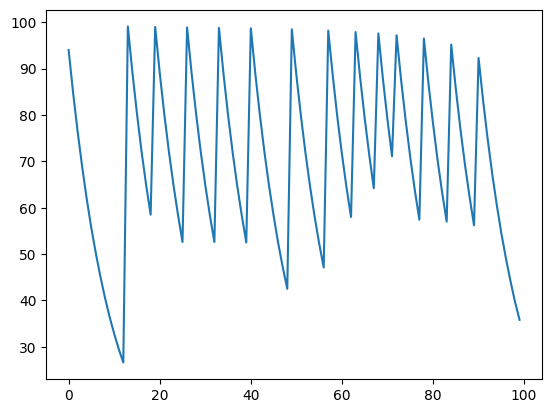

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

price_competitor = [94.0, 84.6, 76.2, 68.6, 61.7, 55.5, 50.0, 
                    45.0, 40.5, 36.4, 32.8, 29.5, 26.6, 99.1, 
                    89.2, 80.3, 72.2, 65.0, 58.5, 99.0, 89.1, 
                    80.2, 72.2, 65.0, 58.5, 52.6, 98.9, 89.0, 
                    80.1, 72.1, 64.9, 58.4, 52.6, 98.8, 88.9, 
                    80.0, 72.0, 64.8, 58.4, 52.5, 98.7, 88.8, 
                    79.9, 71.9, 64.7, 58.3, 52.4, 47.2, 42.5, 
                    98.5, 88.6, 79.8, 71.8, 64.6, 58.1, 52.3, 
                    47.1, 98.2, 88.4, 79.5, 71.6, 64.4, 58.0, 
                    97.9, 88.1, 79.3, 71.4, 64.2, 97.6, 87.8, 
                    79.0, 71.1, 97.2, 87.5, 78.8, 70.9, 63.8, 
                    57.4, 96.5, 86.8, 78.2, 70.3, 63.3, 57.0, 
                    95.2, 85.7, 77.1, 69.4, 62.5, 56.2, 92.3, 
                    83.1, 74.8, 67.3, 60.6, 54.5, 49.1, 44.2, 39.7, 35.8]

print(np.size(price_competitor))

plt.plot(price_competitor)

In [2]:
import pandas as pd

t = range(1,101)
df = pd.DataFrame({"Period": t, "Competitor price": price_competitor})
df.set_index("Period", inplace=True)
df

,Competitor price
Period,
1,94.0
2,84.6
3,76.2
4,68.6
5,61.7
...,...
96,54.5
97,49.1
98,44.2


In [3]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Auto-ARIMA Modell fitten
model = auto_arima(
    price_competitor,
    seasonal=True,       # auf True setzen, wenn saisonal
    trace=True,           # zeigt Fit-Informationen
    error_action="ignore",
    suppress_warnings=True
)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=843.428, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=867.347, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=840.022, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=843.288, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1142.800, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=840.500, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=840.893, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=842.135, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=865.648, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.958 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -417.011
Date:                Tue, 25 Nov 2025   AIC              

In [8]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.arima import ARIMASummary

from copy import deepcopy

models = [AutoARIMA(allowmean=True)]
sf = StatsForecast(models=models, freq="A", n_jobs=-1)
sf.fit(df)

print(ARIMASummary(sf.fitted_[0, 0].model_))
coefs = deepcopy(sf.fitted_[0, 0].model_['coef'])
coefs["mean"] = coefs.pop("intercept")
coefs = {k: round(v, 3) for k, v in coefs.items()}
print(f"Coefficients: {coefs}")
print(f"sigma^2     : {sf.fitted_[0, 0].model_['sigma2']:.2f}")
print(f"loglik      : {sf.fitted_[0, 0].model_['loglik']:.2f}")
print(f"aic         : {sf.fitted_[0, 0].model_['aic']:.2f}")
print(f"aicc        : {sf.fitted_[0, 0].model_['aicc']:.2f}")
print(f"bic         : {sf.fitted_[0, 0].model_['bic']:.2f}")

KeyError: 'ds'